# K-NN on Bag Of Words

In [1]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

In [2]:
con =sqlite3.connect('finaldb.sqlite')

In [3]:
final = pd.read_sql_query("""
SELECT * FROM Reviews
""",con)

def partition(x):
    if x == "negative":
        return 0
    return 1

actualScore = final['Score']

positiveNegative = actualScore.map(partition) 
final['Score'] = positiveNegative

In [4]:
print(final.shape)

(87773, 12)


In [5]:
df_100 = final.sample(n=50000)

In [6]:
print(df_100.head(5))

       index     Id   ProductId          UserId  \
7152    4911   5330  B000BYLQW6  A1IY251KN25VHT   
68691  13021  14207  B0045XE32E  A28I98PKHZZKVB   
15691  62360  67755  B000G6MBUA  A35JPD8Q492FJC   
54727  58605  63621  B002IEZJMA  A31YSTICHFYN7O   
85773  14957  16308  B007TJGZ54  A1KOCGNDLF2VUR   

                                             ProfileName  \
7152                                        A. Patterson   
68691  N. Brabec "Dispensing Unappreciated Advice Daily"   
15691                                            Firefly   
54727                                CPR "xfilebuffyfan"   
85773                                              PEGGY   

       HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
7152                      3                       4      1  1208995200   
68691                     2                       3      1  1299456000   
15691                     0                       0      1  1304640000   
54727                     0         

In [7]:
df_100['Score'].value_counts()

1    42024
0     7976
Name: Score, dtype: int64

In [8]:
#orting the data according to the Time
df_100=df_100.sort_values('Time',axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last')

In [12]:
#split the data set into train and test
y=df_100['Score']
X_1=df_100[0:35000]
X_test=df_100[35000:50000]
y_1=y[0:35000]
y_test=y[35000:50000]

In [13]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
X_1 = count_vect.fit_transform(X_1['Text'].values)

In [14]:
# split the train data set into cross validation train and cross validation test
X_train=X_1[0:24500]
y_train=y_1[0:24500]
X_cv=X_1[24500:35000]
y_cv=y_1[24500:35000]

In [15]:
X_test.head(5)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
66963,42032,45686,B0041NYV8E,A2XA8CW5DF4MNZ,"Iron Man ""JON""",0,0,1,1329091200,A different spark but satisfying!,The Gold Kili All Natural Instant Ginger & Lem...,b'gold kili natur instant ginger lemon beverag...
59166,11323,12332,B00314ITOQ,A2QOQ794ALVHUB,Joslyn,0,0,1,1329091200,The Perfect Finishing Touch!,I was making Valentine Brownie Pops for my Gra...,b'make valentin browni pop grandson classroom ...
77052,37144,40356,B005BV0RLA,A1BZLVVQVELUZW,Texas Dog Lover,4,4,1,1329091200,"A big hit with the ""kids""",I just ordered these after my dogs' favorite c...,b'order dog favorit chew discontinu manufactur...
61494,74275,80809,B003DMXDGA,A9LWNO452P7UU,CJC,0,0,1,1329091200,Yummy As Always,"I love these. They're cheesy, crunchy, and a r...",b'love theyr cheesi crunchi relat healthi junk...
25322,92748,100859,B000U604VE,A1JT9S5P9NKA29,Lindsey,0,0,0,1329091200,Picture of item is not item received,I ordered these for my mother. She did receiv...,b'order mother receiv teddi bear flower basket...


In [16]:
#count_vec = CountVectorizer() 
X_test = count_vect.transform(X_test['Text'].values)

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
# ============================== loading libraries ===========================================
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
# =============================================================================================

In [21]:
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_cv)
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %f%%' % (i, acc))
    
knn = KNeighborsClassifier(1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %f%%' % (acc))


CV accuracy for k = 1 is 80.066667%

CV accuracy for k = 3 is 82.409524%

CV accuracy for k = 5 is 83.019048%

CV accuracy for k = 7 is 83.038095%

CV accuracy for k = 9 is 82.980952%

CV accuracy for k = 11 is 82.895238%

CV accuracy for k = 13 is 82.857143%

CV accuracy for k = 15 is 82.866667%

CV accuracy for k = 17 is 82.876190%

CV accuracy for k = 19 is 82.847619%

CV accuracy for k = 21 is 82.828571%

CV accuracy for k = 23 is 82.790476%

CV accuracy for k = 25 is 82.771429%

CV accuracy for k = 27 is 82.752381%

CV accuracy for k = 29 is 82.733333%

****Test accuracy for k = 1 is 79.946667%


In [32]:
#checking the test accuracy with k=5
knn = KNeighborsClassifier(5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 5 is %f%%' % (acc))


****Test accuracy for k = 1 is 82.940000%


# Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred)
print(cm)

[[  152  2432]
 [  127 12289]]


Text(0.5,1,'Confusion Matrix\n')

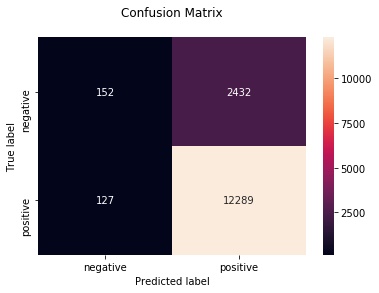

In [34]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

# # 10-fold cross validation


The optimal number of neighbors is 17.


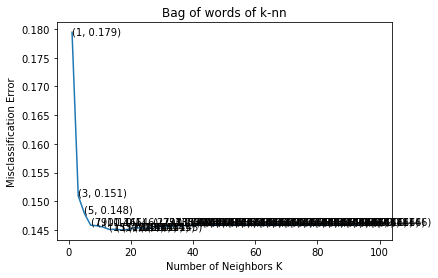

the misclassification error for each k value is :  [0.179 0.151 0.148 0.146 0.146 0.146 0.145 0.145 0.145 0.145 0.145 0.145
 0.145 0.146 0.146 0.146 0.146 0.146 0.146 0.146 0.146 0.146 0.146 0.146
 0.146 0.146 0.146 0.146 0.146 0.146 0.146 0.146 0.146 0.146 0.146 0.146
 0.146 0.146 0.146 0.146 0.146 0.146 0.146 0.146 0.146 0.146 0.146 0.146
 0.146 0.146]


In [23]:
# creating odd list of K for KNN
myList = list(range(0,100))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title('Bag of words of k-nn')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [24]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)
#evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 17 is 82.906667%


# Confusion Matrix

In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, pred)
print(cm)

[[   36  2548]
 [   16 12400]]


In [31]:
tn,fp,fn,tp =confusion_matrix(y_test,pred).ravel()
(tn, fp, fn, tp)

(36, 2548, 16, 12400)

Text(0.5,1,'Confusion Matrix\n')

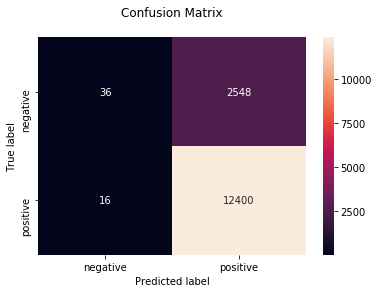

In [27]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

# Conclusion:

| Model|Hyperparameter|Test Accuracy|
|------|------|------|
|K-NN on Bag of Words  |K=5|82.94% |
|K-fold on Bag of Words  |K=17 |82.90%  |